# Exploring Feature Importance in Our Best Model (Random Forest)
- calculate feature importance 
- explore 3 most important features 

## Reccomendations
1. Attention needs to be payed to ease of use 
    - more time the user spends on product related page the more likely it will make a purchase 
2. Product related page is most important as indicated from feature importance and highest correlation with page value
3. If you keep the user on the product related page for 0.08 or more there is a higher chance he will make a purchase 
4. The majority of user activity ends up no Revenue false or no purchase 
    - those users who purchase are mostly new users which signals **bad retention rate** 
    - need to take care of customers so they return (e.g. promotions, engagement, surveys to learn what to improve...)
5. The more pages the user visits less likely he will make a purchase 
    - maybe becasue of developers websrapping the website
    - the more quality information the user can get without leaving a page the better 
    - page should be as easy to use as possible with all the features/info neatly displayed (Amazon 1-click order perfect example)
6. Most traffic happens in 2nd and 4th quarter 
    - we reccomend focusing marketing/coupon effort to that time 

In [8]:
# read in data 
import pandas as pd
data = pd.read_csv('all_model_data.csv', index_col = 0)
data.head()

,Weekend,Revenue,Administrative_Duration_Scaled,Informational_Duration_Scaled,ProductRelated_Duration_Scaled,BounceRates_Scaled,ExitRates_Scaled,PageValues_Scaled,ExitRatesImpute_Scaled,totalFracAdmin_Scaled,...,BounceExitW4_Norm_Scaled,BouncePageRatio_Norm_Scaled,ExitPageRatio_Norm_Scaled,InfoPageRatio_Norm_Scaled,ProdRelPageRatio_Norm_Scaled,InfoBounceRatio_Norm_Scaled,AdminBounceRatio_Norm_Scaled,ProdRelBounceRatio_Norm_Scaled,InfoExitRatio_Norm_Scaled,ProdRelExitRatio_Norm_Scaled
0,False,False,0.0,0.0,0.000000,1.00,1.00,0.0,1.000000,0.0,...,1.718535,-0.366273,-0.496257,-0.298863,-0.532522,-0.39044,-1.029711,-0.986837,-0.491352,-2.077588
1,False,False,0.0,0.0,0.001000,0.00,0.50,0.0,0.499561,0.0,...,1.299009,-0.366273,-0.496257,-0.298863,-0.532522,-0.39044,-1.029711,-0.986837,-0.491352,-1.190272
2,False,False,0.0,0.0,0.000000,1.00,1.00,0.0,1.000000,0.0,...,1.718535,-0.366273,-0.496257,-0.298863,-0.532522,-0.39044,-1.029711,-0.986837,-0.491352,-2.077588
3,False,False,0.0,0.0,0.000042,0.25,0.70,0.0,0.699736,0.0,...,1.584240,-0.366273,-0.496257,-0.298863,-0.532522,-0.39044,-1.029711,0.623730,-0.491352,-1.788555
4,True,False,0.0,0.0,0.009809,0.10,0.25,0.0,0.249341,0.0,...,0.797889,-0.366273,-0.496257,-0.298863,-0.532522,-0.39044,-1.029711,0.990261,-0.491352,-0.279806


In [9]:
# split data into labels and target
X = data.drop('Revenue', axis = 1)
y = data.Revenue

In [10]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [11]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 

feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

Here for instance we see that a lot of page value variations are at the top. We need to choose only one variation of the feature. 

In [47]:
feature_importances.head() # select one from each variation 

,importance
PageValues_Scaled,0.054260
ProdRelPageRatio_Norm_Scaled,0.049078
PageValues_Scaled_Norm,0.047334
ProdRelPageRatio_Scaled_Bin,0.041168
ProdRelPageRatio_Scaled_Norm,0.040761


## Top 5 features on importance
- it is worth mentioning exit rates that are quite to the top but are a mix feature with page values (PageValues_Scaled more important)

In [66]:
feature_importances.iloc[[0,11,17,18,31],:]

,importance
PageValues_Scaled,0.054260
ProductRelated_Duration_Scaled_Norm,0.015960
totalFracAdmin_Scaled,0.010904
Administrative_Duration_Scaled,0.010736
BounceRates_Norm_Scaled,0.009333


In [ ]:
##### select model that performs better in one class, we care more about 1 class 
# these are the things you should focus on and some other things other than web traffic you should focus on 
# another model to predict who is going to purchase 

# average quality of all webpages 
# important for prediction 
# whether the customer is going to purchase how good the erbpage quality is affects the decision 

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

# subsetting dataframe
rev_true = data[data['Revenue']==True]
rev_false = data[data['Revenue']==False]

print(rev_true.shape)
print(rev_false.shape)

(1908, 109)
(10422, 109)


## Feature 1 - PageValues_Scaled

Text(0, 0.5, 'Density')

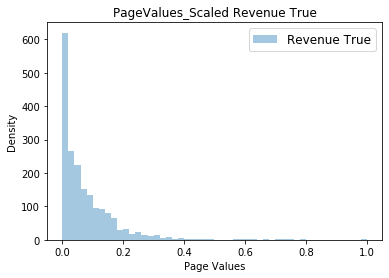

In [50]:
feat1_1 = rev_true.PageValues_Scaled
sns.distplot(feat1_1,  kde=False, label='Revenue True')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('PageValues_Scaled Revenue True')
plt.xlabel('Page Values')
plt.ylabel('Density')

- Higher page value (outliers) lead to revenue 
- Page value gives an idea of which page in your site contributed more to your site's revenue
- To increase revenue attention must be given to quality of the webpage 

Text(0, 0.5, 'Density')

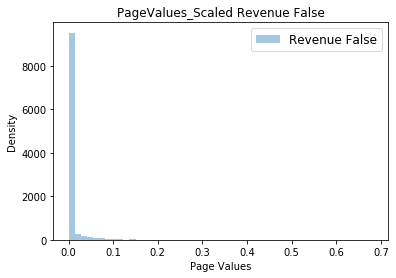

In [52]:
feat1_0 = rev_false.PageValues_Scaled
sns.distplot(feat1_0,  kde=False, label='Revenue False')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('PageValues_Scaled Revenue False')
plt.xlabel('Page Values')
plt.ylabel('Density')

- Lover the page value, less likely the purchase will occur
- Less outliers (values concentrated around 0) 

Text(0.5, 1.0, 'Boxplot Page Values Revenue True')

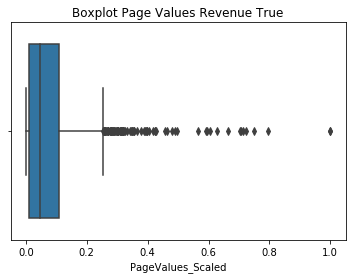

In [54]:
sns.boxplot(x=feat1_1)
plt.title('Boxplot Page Values Revenue True')

- we see better here that page values is bigger and outliers are more to the right when revenue is true

Text(0.5, 1.0, 'Boxplot Page Values Revenue False')

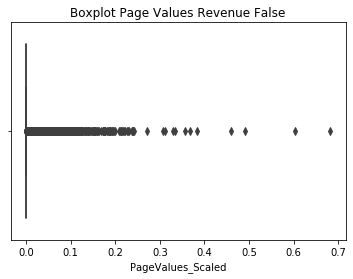

In [55]:
sns.boxplot(x=feat1_0)
plt.title('Boxplot Page Values Revenue False')

- mostly 0 values with majority of outliers around 0-0.3 for revenue false

## Feature 2 - Product Related Duration

Text(0, 0.5, 'Density')

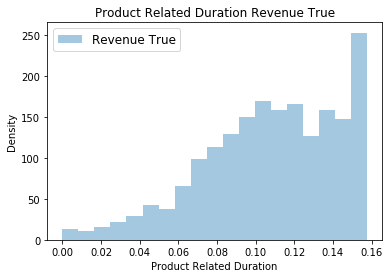

In [69]:
feat1_1 = rev_true.ProductRelated_Duration_Scaled_Norm
sns.distplot(feat1_1,  kde=False, label='Revenue True')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Product Related Duration Revenue True')
plt.xlabel('Product Related Duration')
plt.ylabel('Density')  

Text(0, 0.5, 'Density')

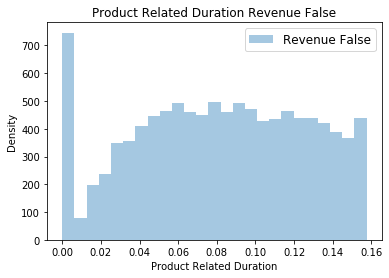

In [70]:
feat1_0 = rev_false.ProductRelated_Duration_Scaled_Norm
sns.distplot(feat1_0,  kde=False, label='Revenue False')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Product Related Duration Revenue False')
plt.xlabel('Product Related Duration')
plt.ylabel('Density')  

Text(0.5, 1.0, 'Boxplot Product Related Duration Revenue True')

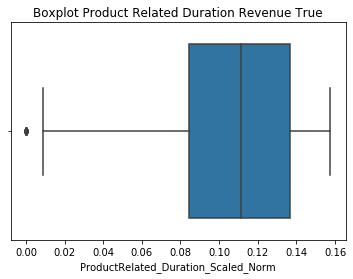

In [71]:
sns.boxplot(x=feat1_1)
plt.title('Boxplot Product Related Duration Revenue True')

- if the user spends from 0.08 and more on the product related page its a high chance he/she will purhcase something 

Text(0.5, 1.0, 'Boxplot Product Related Duration Revenue False')

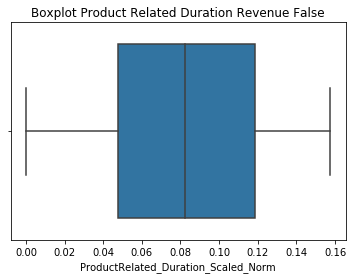

In [72]:
sns.boxplot(x=feat1_0)
plt.title('Boxplot Product Related Duration Revenue False')

- if the user spends less time on the page 0 - 0.12 it will more likely exit 

## Feature 3

Text(0, 0.5, 'Density')

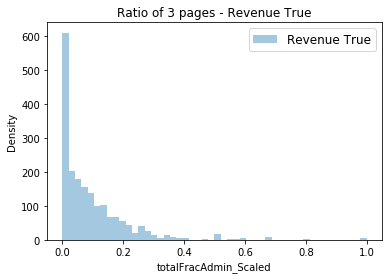

In [73]:
feat1_1 = rev_true.totalFracAdmin_Scaled
sns.distplot(feat1_1,  kde=False, label='Revenue True')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Ratio of 3 pages - Revenue True')
plt.xlabel('totalFracAdmin_Scaled')
plt.ylabel('Density')

- the more time user visits all 3 page more likely he will make a purchase 
- we remember that page value and bounce rate is slighlty negatively correlated 
    - so little bounce rate is good but too much is bad

Text(0, 0.5, 'Density')

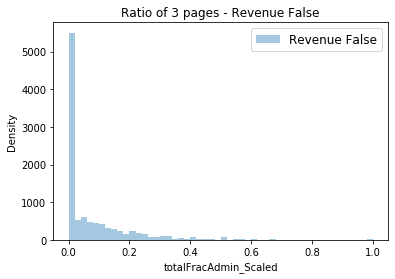

In [74]:
feat1_0 = rev_false.totalFracAdmin_Scaled
sns.distplot(feat1_0,  kde=False, label='Revenue False')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Ratio of 3 pages - Revenue False')
plt.xlabel('totalFracAdmin_Scaled')
plt.ylabel('Density')

Text(0.5, 1.0, 'Boxplot totalFracAdmin_Scaled Revenue True')

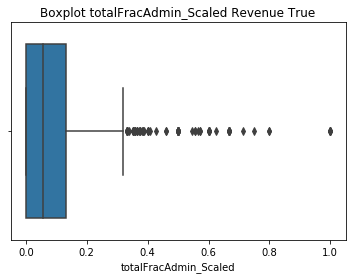

In [75]:
sns.boxplot(x=feat1_1)
plt.title('Boxplot totalFracAdmin_Scaled Revenue True')

- less outliers there are to the right more likely there will be a purchase 

Text(0.5, 1.0, 'Boxplot totalFracAdmin_Scaled Revenue False')

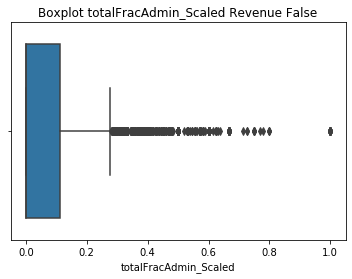

In [76]:
sns.boxplot(x=feat1_0)
plt.title('Boxplot totalFracAdmin_Scaled Revenue False')

- more outliers there are (higher bounce rate) more likely revenue will be False